## Joshua Musei (jmusei2)
## IE598 MLF F19
## Module 7 Homework (Random Forest)


In [1]:
import pandas as pd
import ipywidgets
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
%matplotlib inline

In [2]:
df = pd.read_excel('default of credit card clients.xls',  header = 1)
pd.set_option('display.max_columns', None)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df = df.iloc[:,1:]

In [4]:
df.shape

(30000, 24)

In [5]:
# Data summary
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Using the ccdefault dataset, with 90% for training and 10% for test (stratified sampling) 

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['default payment next month'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Part 1: Random forest estimators
Fit a random forest model, try several different values for N_estimators, report in-sample accuracies. 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

estimator_list = np.arange(10,200,10)
for i in estimator_list:
    forest = RandomForestClassifier(n_estimators=i, random_state=1)
    forest.fit(X_train_std, y_train)
    
    # Make predictions on the training data
    y_pred = forest.predict(X_train_std)
    
    # Calculate the accuracy of the random forest classifier with train data
    accuracy = accuracy_score(y_train, y_pred)
    print(f"In Sample Accuracy with n_estimators {i}: {accuracy}")
    
    

In Sample Accuracy with n_estimators 10: 0.9793333333333333
In Sample Accuracy with n_estimators 20: 0.9931111111111111
In Sample Accuracy with n_estimators 30: 0.997
In Sample Accuracy with n_estimators 40: 0.9982962962962963
In Sample Accuracy with n_estimators 50: 0.9988888888888889
In Sample Accuracy with n_estimators 60: 0.9992222222222222
In Sample Accuracy with n_estimators 70: 0.9993333333333333
In Sample Accuracy with n_estimators 80: 0.9993333333333333
In Sample Accuracy with n_estimators 90: 0.9993703703703704
In Sample Accuracy with n_estimators 100: 0.9993703703703704
In Sample Accuracy with n_estimators 110: 0.9993703703703704
In Sample Accuracy with n_estimators 120: 0.9993703703703704
In Sample Accuracy with n_estimators 130: 0.9993703703703704
In Sample Accuracy with n_estimators 140: 0.9993703703703704
In Sample Accuracy with n_estimators 150: 0.9993703703703704
In Sample Accuracy with n_estimators 160: 0.9993703703703704
In Sample Accuracy with n_estimators 170: 0.99

## Part 2: Random forest feature importance

 1) PAY_0                          0.098322
 2) AGE                            0.066592
 3) BILL_AMT1                      0.060926
 4) LIMIT_BAL                      0.059803
 5) BILL_AMT2                      0.054237
 6) BILL_AMT3                      0.051420
 7) BILL_AMT6                      0.050970
 8) BILL_AMT4                      0.050577
 9) BILL_AMT5                      0.050087
10) PAY_AMT1                       0.049788
11) PAY_AMT2                       0.047749
12) PAY_2                          0.047524
13) PAY_AMT6                       0.046679
14) PAY_AMT3                       0.046363
15) PAY_AMT5                       0.043727
16) PAY_AMT4                       0.043163
17) PAY_3                          0.026592
18) PAY_4                          0.024030
19) EDUCATION                      0.020237
20) PAY_5                          0.018273
21) PAY_6                          0.017187
22) MARRIAGE                       0.013754
23) SEX                         

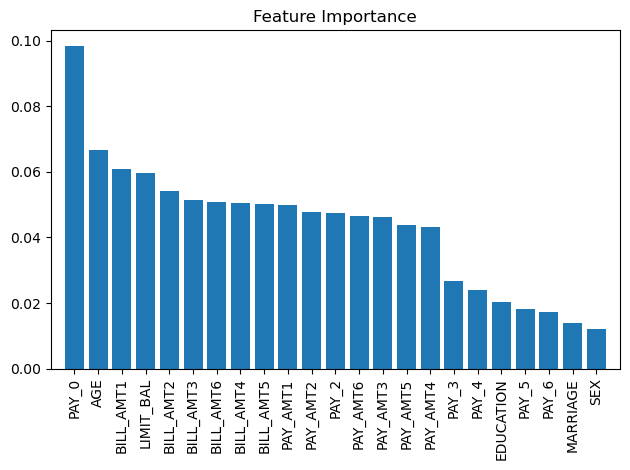

In [9]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train_std, y_train)

feat_labels = df.columns[:-1]

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

## Part 3: Conclusions

* After changing the number of trees in the random forest , we noticed that increasing the number of trees in the random forest generally improves the in-sample accuracy, although there is diminishing returns after a certain point. However, increasing the number of decision trees led to an increased in computation time. 

* The optimal number of estimators for your forest is 100.

* The most important features in my model are Pay_0, Age, Bill_AMT1, Limit_AMT2, Bill_AMT2 and Bill_AMT6

* Feature importance is a metric that measures the contribution of each feature in a machine learning model to the model's prediction performance. There are several methods for calculating feature importance in machine learning, but one of the most commonly used methods is based on the reduction in impurity or variance that is achieved when a feature is included in a decision tree or random forest model. This method is called Mean Decrease Impurity (MDI) or Mean Decrease Gini (MDG) for decision trees and Random Forest models respectively.


In [10]:
print("My name is {Muzei Joshua}")
print("My NetID is: {jmuzei2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")


My name is {Muzei Joshua}
My NetID is: {jmuzei2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
